In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
count_classes = pd.value_counts(df['Class'], sort=True).sort_index()
count_classes

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

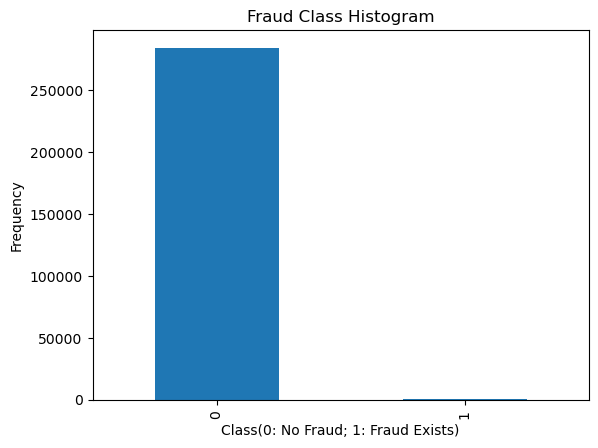

In [13]:
count_classes.plot(kind="bar")
plt.title("Fraud Class Histogram")
plt.xlabel("Class(0: No Fraud; 1: Fraud Exists)")
plt.ylabel("Frequency")

In [14]:
from sklearn.preprocessing import StandardScaler
df["normAmount"] = StandardScaler().fit_transform(df["Amount"].values.reshape(-1, 1))
df = df.drop(["Time", "Amount"], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
# 由于数据不平衡，需要采用不同的方法平衡数据，并在不同的方法中使用不同的模型以获得最优预测。

In [15]:
# 1. Tomek Links下采样
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)  # 从数据集中删除目标变量，保留特征
y = df['Class']  # 选择目标变量

In [16]:
# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [17]:
# 初始化 Tomek Links 欠采样方法
tl = TomekLinks(sampling_strategy='majority')

In [18]:
# 对训练数据进行欠采样
X_train_resampled, y_train_resampled = tl.fit_resample(X_train, y_train)

In [19]:
# 将处理后的数据转换为 DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Class'])

# 合并特征和目标列，以创建处理后的训练数据集
resampled_train_df = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# 查看处理后的数据集
resampled_train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.323963,0
1,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.341275,0
2,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346835,0
3,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.328841,0
4,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008994,0


In [20]:
# 使用随机森林模型预测和评估模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [21]:
# 使用随机森林模型
clf = RandomForestClassifier(random_state=42)

In [22]:
# 训练模型
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [23]:
# 对测试数据进行预测
y_pred = clf.predict(X_test)

In [24]:
# 计算各种评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

In [25]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_mat}")

Accuracy: 0.9995962220427653
Precision: 0.9411764705882353
Recall: 0.8163265306122449
F1 Score: 0.8743169398907105
ROC AUC Score: 0.9081193007591333
Confusion Matrix:
[[56859     5]
 [   18    80]]


In [26]:
# 使用 5-折交叉验证
cv_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

In [27]:
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean()}")

Cross-Validation F1 Scores: [0.80882353 0.88       0.84137931 0.85915493 0.88111888]
Mean F1 Score: 0.8540953300905876
